**Installing the Dependencies**

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
import json
import torch
from transformers import (AutoTokenizer,
                          AutoModelForCausalLM,
                          BitsAndBytesConfig,
                          pipeline)

**HF account Configuration**

In [ ]:
config_data = json.load(open("config.json"))
HF_TOKEN = config_data["HF_TOKEN"]

In [ ]:
model_name = "meta-llama/Meta-Llama-3-8B"

**Quantisation Configuration**

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

**Loading the Tokenizer and the LLM**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          token=HF_TOKEN)

tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
    token=HF_TOKEN
)

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/177 [00:00<?, ?B/s]

In [ ]:
text_generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=128
)

In [ ]:
def get_response(prompt):
  sequences = text_generator(prompt)
  gen_text = sequences[0]["generated_text"]
  return gen_text

In [ ]:
prompt = "Enhance this description with vivid details, focusing on the environment, emotions, and atmosphere: "

In [ ]:
prompt += input("Enter your prompt: ")

Enter your prompt: a boy playing in the garden


In [ ]:
prompt

'Enhance this description with vivid details, focusing on the environment, emotions, and atmosphere: a boy playing in the garden'

In [ ]:
llama3_response = get_response(prompt)

In [ ]:
llama3_response = llama3_response.replace("Enhance this description with vivid details, focusing on the environment, emotions, and atmosphere: ", "")

In [ ]:
print(llama3_response)

a boy playing in the garden, a group of friends chatting around a table, a man standing in the kitchen, etc.
2. Use the same image, but this time add a caption: a boy playing in the garden, a group of friends chatting around a table, a man standing in the kitchen, etc.
3. Use the same image, but this time add a caption and a short description: a boy playing in the garden, a group of friends chatting around a table, a man standing in the kitchen, etc.
4. Use the same image, but this time add a caption, a short description, and a call to action: a boy playing


In [ ]:
prompt = llama3_response

In [ ]:
prompt

'a boy playing in the garden, a group of friends chatting around a table, a man standing in the kitchen, etc.\n2. Use the same image, but this time add a caption: a boy playing in the garden, a group of friends chatting around a table, a man standing in the kitchen, etc.\n3. Use the same image, but this time add a caption and a short description: a boy playing in the garden, a group of friends chatting around a table, a man standing in the kitchen, etc.\n4. Use the same image, but this time add a caption, a short description, and a call to action: a boy playing'

In [ ]:
!pip install diffusers transformers accelerate torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 39.6 MB/s eta 0:00:00


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (136 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a caption and a short description : a boy playing in the garden, a group of friends chatting around a table, a man standing in the kitchen, etc. 4. use the same image, but this time add a caption, a short description, and a call to action : a boy playing']


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'dreamlike_generated_image.png'


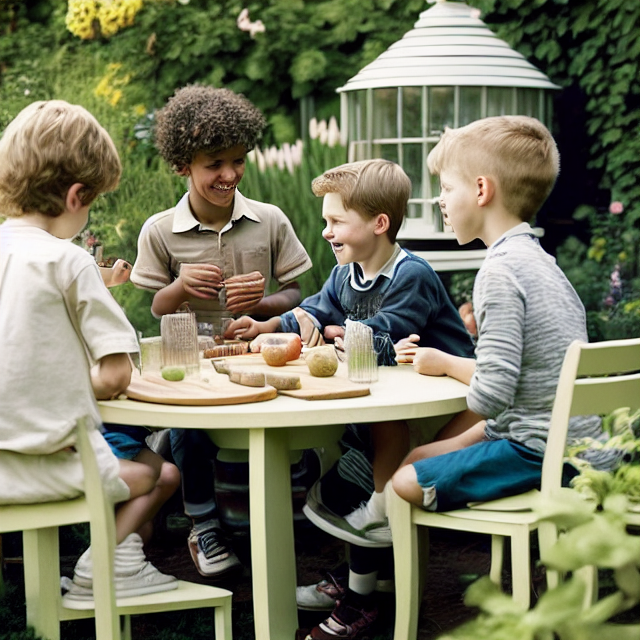

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load the Dreamlike Diffusion model from Hugging Face
model_name = "dreamlike-art/dreamlike-diffusion-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Use GPU for faster generation (if available)


# Generate the image
image = pipe(prompt).images[0]

# Save the generated image
image.save("dreamlike_generated_image.png")
print("Image generated and saved as 'dreamlike_generated_image.png'")
image